In [210]:
# importing the relavant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [211]:
# reading the dataset
df = pd.read_csv('day.csv')

# Data understanding, preparation and EDA

In [212]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [213]:
df.shape

(730, 16)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


There is no null values in any column, so we will move forward

In [215]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<function matplotlib.pyplot.show(close=None, block=None)>

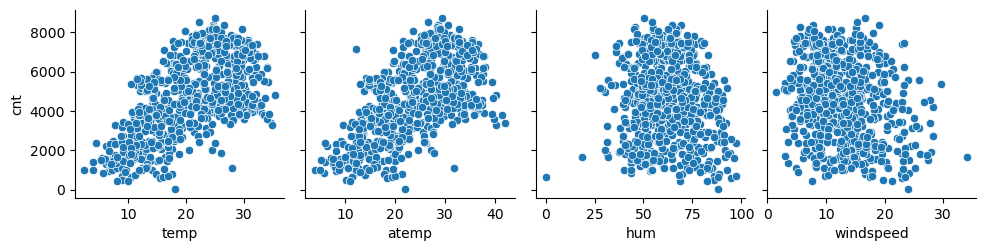

In [216]:
# keeping cnt as our target variable, hence all other variables will be the predicted variables
# visualising the data with numerical variables
sns.pairplot(data = df, y_vars = 'cnt', x_vars = ['temp', 'atemp', 'hum','windspeed'])
plt.show

linear relation can be seen only with temp and atemp

In [217]:
# converting seasons from 1,2,3,4 to spring,summer,fall,winter
season_mapping = {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
df['season'] = df['season'].map(season_mapping)

In [218]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [219]:
# converting weathersit also; here naming them as well
# 1: Clear, Few clouds, Partly cloudy, Partly cloudy == Partly Cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist == Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds == Light Raining
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog == Heavy Raining

weather_mapping = {1: 'Partly Cloudy',2: 'Mist', 3: 'Light Raining', 4: 'Heavy Raining'}
df['weathersit'] = df['weathersit'].map(weather_mapping)

In [220]:
# converting weekday also, assuming 0 as Sunday and so on
workingday_mapping = {0:'sunday', 1:'monday',2:'tuesday',3:'wednesday',4:'thursday',5:'Friday',6:'Saturday'}
df['weekday'] = df['weekday'].map(workingday_mapping)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,wednesday,1,Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,thursday,1,Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,Friday,1,Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [221]:
# converting months also
month_mapping = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June', 7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}
df['mnth'] = df['mnth'].map(month_mapping)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,wednesday,1,Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,thursday,1,Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<function matplotlib.pyplot.show(close=None, block=None)>

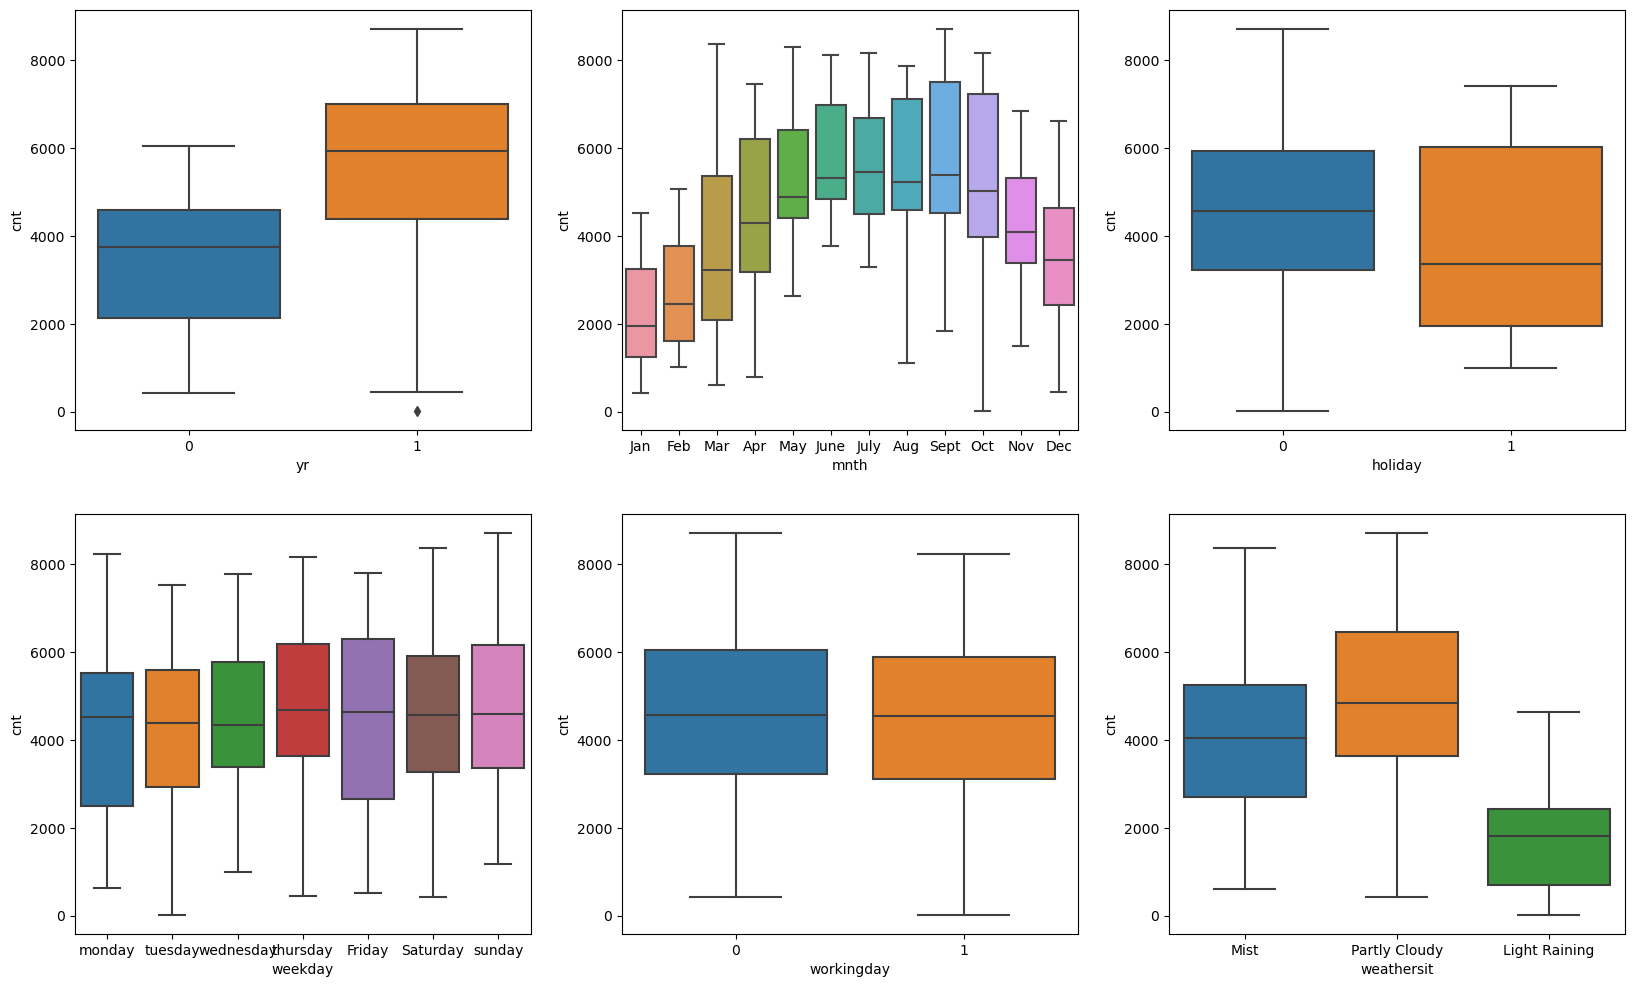

In [222]:
#visualising the categorical variables
plt.figure(figsize=(20,12))
plt.subplot(2,3,1)
sns.boxplot(x='yr', y='cnt', data =df)
plt.subplot(2,3,2)
sns.boxplot(x='mnth', y='cnt', data =df)
plt.subplot(2,3,3)
sns.boxplot(x='holiday', y='cnt', data =df)
plt.subplot(2,3,4)
sns.boxplot(x='weekday', y='cnt', data =df)
plt.subplot(2,3,5)
sns.boxplot(x='workingday', y='cnt', data =df)
plt.subplot(2,3,6)
sns.boxplot(x='weathersit', y='cnt', data =df)
plt.show

Few observation:
- There is an increase in number of users from year 0 to year 1
- in months, the curve is bell shaped
- working day does not have much impact 
- in weekdays also it is almost same

Also, there are no outliers in the data


### Preparing data for modelling

In [223]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,monday,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,tuesday,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,wednesday,1,Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,thursday,1,Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Friday,1,Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [224]:
#creating dummy variables for variables having labels (season)
seasons = pd.get_dummies(df['season'])
seasons.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [225]:
# Now, we don't need four columns. You can drop the fall column, as the type of season can be identified with just the three columns where -

# 000 will correspond to fall
# 100 will correspond to spring
# 010 will correspond to summer
# 001 will correspond to winter

In [226]:
# dropping the redundant dummy var
seasons = pd.get_dummies(df['season'], drop_first =True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [227]:
#creating dummy variables for weathersit
weathers = pd.get_dummies(df['weathersit'])
weathers.head()

,Light Raining,Mist,Partly Cloudy
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [228]:
# dropping the redundant dummy var
weathers = pd.get_dummies(df['weathersit'], drop_first =True)
weathers.head()

,Mist,Partly Cloudy
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [229]:
#creating dummy variables for month and weekday
months = pd.get_dummies(df['mnth'])

# dropping the redundant dummy var
months = pd.get_dummies(df['mnth'], drop_first =True)

months.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [230]:
#creating dummy variables for weekday
weekdays = pd.get_dummies(df['weekday'])

# dropping the redundant dummy var
weekdays = pd.get_dummies(df['weekday'], drop_first =True)
                          
weekdays.head()

,Saturday,monday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [231]:
# concatinating weathers and seasons with df
df1 = pd.concat([df,seasons,weathers,months,weekdays], axis = 1)

In [232]:
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,May,Nov,Oct,Sept,Saturday,monday,sunday,thursday,tuesday,wednesday
0,1,01-01-2018,spring,0,Jan,0,monday,1,Mist,14.110847,...,0,0,0,0,0,1,0,0,0,0
1,2,02-01-2018,spring,0,Jan,0,tuesday,1,Mist,14.902598,...,0,0,0,0,0,0,0,0,1,0
2,3,03-01-2018,spring,0,Jan,0,wednesday,1,Partly Cloudy,8.050924,...,0,0,0,0,0,0,0,0,0,1
3,4,04-01-2018,spring,0,Jan,0,thursday,1,Partly Cloudy,8.200000,...,0,0,0,0,0,0,0,1,0,0
4,5,05-01-2018,spring,0,Jan,0,Friday,1,Partly Cloudy,9.305237,...,0,0,0,0,0,0,0,0,0,0


In [233]:
df1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'spring', 'summer', 'winter', 'Mist',
       'Partly Cloudy', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar',
       'May', 'Nov', 'Oct', 'Sept', 'Saturday', 'monday', 'sunday', 'thursday',
       'tuesday', 'wednesday'],
      dtype='object')

In [234]:
# droping the redundant columns
df2 = df1.drop(['instant', 'dteday', 'season', 'mnth', 'weekday','weathersit','casual', 'registered',], axis = 1)
df2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sept,Saturday,monday,sunday,thursday,tuesday,wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
# splitting data into train and test
df_train, df_test = train_test_split(df2, train_size = 0.7, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [236]:
df2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Mist', 'Partly Cloudy', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sept',
       'Saturday', 'monday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [237]:
# scalling all the numeric variables
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# fitting
df_train[num_vars] = scaler.fit_transform (df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sept,Saturday,monday,sunday,thursday,tuesday,wednesday
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,1,0,0,0
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,0,0,0,1,0,0,0


In [238]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sept,Saturday,monday,sunday,thursday,tuesday,wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.086275,0.084314,0.080392,0.129412,0.154902,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.281045,0.278131,0.272166,0.335985,0.362166,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Training the model

#### we'll use the backward selection technique

In [239]:
df2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sept,Saturday,monday,sunday,thursday,tuesday,wednesday
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


In [240]:
df2.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'spring', 'summer', 'winter', 'Mist', 'Partly Cloudy', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sept',
       'Saturday', 'monday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [241]:
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

# Model Building and Evaluation

Since, we'll use the statsmodel method for creating the model

In [242]:
# Building a model with all the variables
X_train_sm = sm.add_constant(X_train)

# creating the model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     93.97
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          1.24e-177
Time:                        16:30:10   Log-Likelihood:                 523.07
No. Observations:                 510   AIC:                            -986.1
Df Residuals:                     480   BIC:                            -859.1
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1422      0.090      1.573      0.116      -0.035       0.320
yr                0.2312      0.008     28.360      0.000       0.215       0.247
holiday          -0.1345      0.066     -2.054      0.041      -0.263      -0.006
workingday       -0.0605      0.071     -0.849      0.396      -0.200       0.079
temp              0.3873      0.143      2.699      0.007       0.105       0.669
atemp             0.0547      0.139      0.392      0.695      -0.219       0.329
hum              -0.1579      0.039     -4.050      0.000      -0.234      -0.081
windspeed        -0.1802      0.027     -6.751      0.000      -0.233      -0.128
spring           -0.0409      0.030     -1.349      0.178      -0.100       0.019
summer            0.0458      0.026      1.733      0.084      -0.006       0.098
winter            0.1121      0.028      3.969      0.000       0.057       0.168
Mist              0.1914      0.025      7.569      0.000       0.142       0.241
Partly Cloudy     0.2492      0.027      9.324      0.000       0.197       0.302
Aug               0.0291      0.034      0.849      0.396      -0.038       0.096
Dec              -0.0444      0.034     -1.308      0.191      -0.111       0.022
Feb              -0.0373      0.033     -1.119      0.264      -0.103       0.028
Jan              -0.0640      0.034     -1.887      0.060      -0.131       0.003
July             -0.0274      0.035     -0.773      0.440      -0.097       0.042
June              0.0097      0.025      0.384      0.701      -0.040       0.059
Mar               0.0010      0.025      0.041      0.967      -0.048       0.050
May               0.0256      0.021      1.196      0.232      -0.016       0.068
Nov              -0.0395      0.037     -1.076      0.282      -0.112       0.033
Oct               0.0058      0.036      0.159      0.874      -0.065       0.077
Sept              0.0916      0.032      2.837      0.005       0.028       0.155
Saturday         -0.0557      0.072     -0.777      0.438      -0.197       0.085
monday           -0.0247      0.015     -1.688      0.092      -0.053       0.004
sunday           -0.0499      0.072     -0.696      0.487      -0.191       0.091
thursday          0.0042      0.015      0.280      0.780      -0.025       0.034
tuesday          -0.0261      0.015     -1.776      0.076      -0.055       0.003
wednesday        -0.0103      0.015     -0.670      0.503      -0.040       0.020
==============================================================================
Omnibus:                       78.724   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.783
Skew:                          -0.768   Prob(JB):                     7.59e-46
Kurtosis:                       5.724   Cond. No.            

In [243]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
3,temp,441.50
4,atemp,381.91
2,workingday,82.92
5,hum,38.89
11,Partly Cloudy,25.29
25,sunday,16.31
23,Saturday,15.40
7,spring,13.71
10,Mist,12.88
9,winter,12.47


Below are the variables with both p value >0.05 and VIF>5

atemp
workingday
sunday
Saturday
spring
summer
Nov
Aug
Oct
Jan
July
Dec

We'll definitely drop them

In [244]:
X = X_train.drop(['atemp', 'workingday', 'sunday', 'Saturday', 'spring', 'summer', 'Nov', 'Aug', 'Oct', 'Jan', 'July', 'Dec'], axis = 1)

In [245]:
# create another model
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     138.1
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          8.60e-175
Time:                        16:30:10   Log-Likelihood:                 485.93
No. Observations:                 510   AIC:                            -935.9
Df Residuals:                     492   BIC:                            -859.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0108      0.046      0.233      0.816      -0.080       0.102
yr                0.2312      0.009     27.031      0.000       0.214       0.248
holiday          -0.0944      0.028     -3.425      0.001      -0.148      -0.040
temp              0.5591      0.024     23.526      0.000       0.512       0.606
hum              -0.1731      0.040     -4.321      0.000      -0.252      -0.094
windspeed        -0.1613      0.027     -5.971      0.000      -0.214      -0.108
winter            0.1245      0.011     10.844      0.000       0.102       0.147
Mist              0.1858      0.026      7.027      0.000       0.134       0.238
Partly Cloudy     0.2352      0.028      8.427      0.000       0.180       0.290
Feb              -0.0264      0.019     -1.395      0.164      -0.064       0.011
June              0.0348      0.017      2.001      0.046       0.001       0.069
Mar               0.0276      0.016      1.767      0.078      -0.003       0.058
May               0.0815      0.016      4.959      0.000       0.049       0.114
Sept              0.0959      0.016      5.818      0.000       0.063       0.128
monday           -0.0256      0.013     -2.027      0.043      -0.050      -0.001
thursday          0.0060      0.013      0.457      0.648      -0.020       0.032
tuesday          -0.0283      0.013     -2.227      0.026      -0.053      -0.003
wednesday        -0.0081      0.013     -0.601      0.548      -0.035       0.018
==============================================================================
Omnibus:                       49.210   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.888
Skew:                          -0.548   Prob(JB):                     1.67e-23
Kurtosis:                       4.933   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [246]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
3,hum,19.07
2,temp,10.60
7,Partly Cloudy,10.46
6,Mist,7.52
4,windspeed,4.27
0,yr,2.08
5,winter,1.82
15,tuesday,1.40
13,monday,1.39
14,thursday,1.38


Now, dropping variables with high p-value even if they have low VIF
Below are the variables:
Feb Mar thur wednesday

In [247]:
X.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'winter', 'Mist',
       'Partly Cloudy', 'Feb', 'June', 'Mar', 'May', 'Sept', 'monday',
       'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [248]:
X = X.drop(['Feb', 'Mar', 'thursday', 'wednesday'], axis = 1)

In [249]:
# create another model
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     178.8
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          1.22e-177
Time:                        16:30:11   Log-Likelihood:                 482.10
No. Observations:                 510   AIC:                            -936.2
Df Residuals:                     496   BIC:                            -876.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0105      0.046      0.231      0.817      -0.079       0.100
yr                0.2311      0.009     26.944      0.000       0.214       0.248
holiday          -0.1035      0.027     -3.822      0.000      -0.157      -0.050
temp              0.5638      0.022     25.272      0.000       0.520       0.608
hum              -0.1744      0.040     -4.341      0.000      -0.253      -0.095
windspeed        -0.1589      0.027     -5.889      0.000      -0.212      -0.106
winter            0.1230      0.011     11.528      0.000       0.102       0.144
Mist              0.1856      0.026      7.013      0.000       0.134       0.238
Partly Cloudy     0.2349      0.028      8.420      0.000       0.180       0.290
June              0.0318      0.017      1.835      0.067      -0.002       0.066
May               0.0791      0.016      4.878      0.000       0.047       0.111
Sept              0.0941      0.016      5.720      0.000       0.062       0.126
monday           -0.0258      0.012     -2.161      0.031      -0.049      -0.002
tuesday          -0.0285      0.012     -2.371      0.018      -0.052      -0.005
==============================================================================
Omnibus:                       46.876   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.987
Skew:                          -0.497   Prob(JB):                     3.56e-24
Kurtosis:                       5.023   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [250]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
3,hum,18.24
7,Partly Cloudy,9.77
2,temp,9.41
6,Mist,7.34
4,windspeed,4.10
0,yr,2.07
5,winter,1.58
8,June,1.29
11,monday,1.24
12,tuesday,1.24


Now the p value for June has increased and came above 0.05, so
1. We'll remove June
2. We'll remove features with high VIF - hum, Partly Cloudy, temp, Mist

In [251]:
X = X.drop(['June'], axis = 1)

In [252]:
X.columns

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'winter', 'Mist',
       'Partly Cloudy', 'May', 'Sept', 'monday', 'tuesday'],
      dtype='object')

In [253]:
# create another model
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.5
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          4.57e-178
Time:                        16:30:11   Log-Likelihood:                 480.37
No. Observations:                 510   AIC:                            -934.7
Df Residuals:                     497   BIC:                            -879.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0116      0.046      0.253      0.800      -0.078       0.101
yr                0.2305      0.009     26.830      0.000       0.214       0.247
holiday          -0.1046      0.027     -3.855      0.000      -0.158      -0.051
temp              0.5769      0.021     27.251      0.000       0.535       0.619
hum              -0.1804      0.040     -4.494      0.000      -0.259      -0.102
windspeed        -0.1604      0.027     -5.932      0.000      -0.213      -0.107
winter            0.1211      0.011     11.375      0.000       0.100       0.142
Mist              0.1860      0.027      7.010      0.000       0.134       0.238
Partly Cloudy     0.2350      0.028      8.403      0.000       0.180       0.290
May               0.0742      0.016      4.627      0.000       0.043       0.106
Sept              0.0891      0.016      5.479      0.000       0.057       0.121
monday           -0.0253      0.012     -2.116      0.035      -0.049      -0.002
tuesday          -0.0282      0.012     -2.339      0.020      -0.052      -0.005
==============================================================================
Omnibus:                       46.854   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              107.138
Skew:                          -0.499   Prob(JB):                     5.44e-24
Kurtosis:                       5.011   Cond. No.                         25.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [254]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
3,hum,18.03
7,Partly Cloudy,9.77
2,temp,8.42
6,Mist,7.34
4,windspeed,4.10
0,yr,2.07
5,winter,1.56
10,monday,1.24
11,tuesday,1.24
8,May,1.19


Now, we'll drop the variables with high VIF, but we'll drop it one by ne

In [255]:
X = X.drop(['hum'], axis =1)

In [256]:
X.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'winter', 'Mist', 'Partly Cloudy',
       'May', 'Sept', 'monday', 'tuesday'],
      dtype='object')

In [257]:
# create another model
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     200.4
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          6.01e-175
Time:                        16:30:11   Log-Likelihood:                 470.22
No. Observations:                 510   AIC:                            -916.4
Df Residuals:                     498   BIC:                            -865.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1405      0.031     -4.495      0.000      -0.202      -0.079
yr                0.2343      0.009     26.896      0.000       0.217       0.251
holiday          -0.1059      0.028     -3.830      0.000      -0.160      -0.052
temp              0.5552      0.021     26.432      0.000       0.514       0.597
windspeed        -0.1263      0.026     -4.777      0.000      -0.178      -0.074
winter            0.1110      0.011     10.467      0.000       0.090       0.132
Mist              0.2071      0.027      7.785      0.000       0.155       0.259
Partly Cloudy     0.2846      0.026     10.866      0.000       0.233       0.336
May               0.0627      0.016      3.890      0.000       0.031       0.094
Sept              0.0825      0.017      4.998      0.000       0.050       0.115
monday           -0.0261      0.012     -2.135      0.033      -0.050      -0.002
tuesday          -0.0324      0.012     -2.645      0.008      -0.056      -0.008
==============================================================================
Omnibus:                       42.943   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.705
Skew:                          -0.499   Prob(JB):                     1.49e-19
Kurtosis:                       4.757   Cond. No.                         16.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [258]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
6,Partly Cloudy,7.36
2,temp,6.70
5,Mist,4.17
3,windspeed,4.02
0,yr,2.07
4,winter,1.36
9,monday,1.23
10,tuesday,1.23
7,May,1.18
8,Sept,1.18


Now, we'll drop Partly Cloudy

In [259]:
X = X.drop(['Partly Cloudy'], axis =1)

In [260]:
# create another model
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     169.0
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          3.59e-153
Time:                        16:32:42   Log-Likelihood:                 415.96
No. Observations:                 510   AIC:                            -809.9
Df Residuals:                     499   BIC:                            -763.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1397      0.020      7.121      0.000       0.101       0.178
yr             0.2399      0.010     24.828      0.000       0.221       0.259
holiday       -0.0923      0.031     -3.008      0.003      -0.153      -0.032
temp           0.5562      0.023     23.831      0.000       0.510       0.602
windspeed     -0.1554      0.029     -5.315      0.000      -0.213      -0.098
winter         0.0967      0.012      8.270      0.000       0.074       0.120
Mist          -0.0642      0.010     -6.278      0.000      -0.084      -0.044
May            0.0654      0.018      3.652      0.000       0.030       0.101
Sept           0.0726      0.018      3.966      0.000       0.037       0.109
monday        -0.0257      0.014     -1.894      0.059      -0.052       0.001
tuesday       -0.0257      0.014     -1.891      0.059      -0.052       0.001
==============================================================================
Omnibus:                      102.360   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.708
Skew:                          -0.974   Prob(JB):                     6.73e-62
Kurtosis:                       6.076   Cond. No.                         10.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [261]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
2,temp,3.73
3,windspeed,3.00
0,yr,2.00
5,Mist,1.46
4,winter,1.28
8,monday,1.22
9,tuesday,1.22
6,May,1.18
7,Sept,1.17
1,holiday,1.04


In [262]:
X = X.drop(['monday', 'tuesday'], axis =1)

In [263]:
# create another model
X_train_sm = sm.add_constant(X)

# create model
lr = sm.OLS(y_train, X_train_sm)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 04 Oct 2023   Prob (F-statistic):          3.44e-154
Time:                        16:38:10   Log-Likelihood:                 412.88
No. Observations:                 510   AIC:                            -807.8
Df Residuals:                     501   BIC:                            -769.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1326      0.019      6.812      0.000       0.094       0.171
yr             0.2401      0.010     24.762      0.000       0.221       0.259
holiday       -0.0898      0.031     -2.923      0.004      -0.150      -0.029
temp           0.5565      0.023     23.753      0.000       0.510       0.603
windspeed     -0.1592      0.029     -5.432      0.000      -0.217      -0.102
winter         0.0953      0.012      8.131      0.000       0.072       0.118
Mist          -0.0633      0.010     -6.173      0.000      -0.083      -0.043
May            0.0671      0.018      3.733      0.000       0.032       0.102
Sept           0.0734      0.018      3.991      0.000       0.037       0.110
==============================================================================
Omnibus:                      105.005   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              299.730
Skew:                          -0.986   Prob(JB):                     8.21e-66
Kurtosis:                       6.196   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [264]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by ='VIF', ascending = False)
vif

,Features,VIF
2,temp,3.64
3,windspeed,2.89
0,yr,2.00
5,Mist,1.46
4,winter,1.26
6,May,1.18
7,Sept,1.17
1,holiday,1.03


#### Now, R-squared is 76.9%, which is good. Also, p-values are less than 0.05 and VIF is also less than 5. So we can say, this is our final model

### Residual Analysis

C:\Users\hp\AppData\Local\Temp\ipykernel_10448\3618499596.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res);


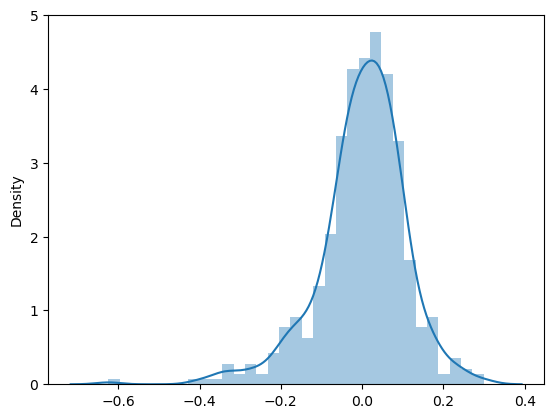

In [266]:
y_train_pred = lr_model.predict(X_train_sm)

res = y_train - y_train_pred
sns.distplot(res);

##### now we'll look at R squared on the test set here, we need to do the scaling again as all the coefficients are scaled between 0 and 1.

In [267]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# fitting
df_test[num_vars] = scaler.transform (df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sept,Saturday,monday,sunday,thursday,tuesday,wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,1,0,0,0,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,1,0,0,0,0,0


In [268]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,May,Nov,Oct,Sept,Saturday,monday,sunday,thursday,tuesday,wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.072727,0.086364,0.086364,0.172727,0.118182,0.154545,0.140909,0.122727,0.159091
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.260281,0.281541,0.281541,0.378873,0.323559,0.362295,0.348721,0.328872,0.366595
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [269]:
y_test = df_test.pop('cnt')
X_test = df_test

In [270]:
# add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,...,May,Nov,Oct,Sept,Saturday,monday,sunday,thursday,tuesday,wednesday
184,1.0,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.842587,0.610133,0.153728,0,1,...,0,0,0,0,0,0,0,1,0,0
299,1.0,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,...,0,0,1,0,1,0,0,0,0,0
221,1.0,0,0,1,0.881625,0.795343,0.437098,0.339570,0,0,...,0,0,0,0,0,0,0,0,0,0
152,1.0,0,0,0,0.817246,0.741471,0.314298,0.537414,0,1,...,0,0,0,0,1,0,0,0,0,0


In [273]:
# in the final model we have dropped some variables, which we need to drop here as well
X_test_sm = X_test_sm.drop(['workingday','atemp','hum','spring','summer','Partly Cloudy','Aug','Dec','Feb','Jan','July','June','Mar','Nov','Oct','Saturday','monday','sunday','thursday','tuesday','wednesday'], axis = 1)

In [275]:
# predict
y_test_pred = lr_model.predict(X_test_sm)

In [278]:
# evaluating the model (to compute the R square)
r2_square = r2_score(y_test, y_test_pred)
r2_square

0.751902544656545

#### The r-squared in test set is coming to be 75.1%, which is close to R-squared of train test which was 76.9%


#### Demand of bikes depend on temp, windspeed, year, Mist, winter, May, Sept, holiday
